##  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations


In [ ]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  Constants definitions 
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)
n = 1280; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = f(N) = 0;

In [1]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  Both ends fixed
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Fixed right end
d0(N) = 1.0; d0(N-1) = 7.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(L - x).^2;
ErrMax = max(abs(y-y_exact))

ErrMax =   2.3818e-007


In [ ]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  Both ends Pinned
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Pinned left end
d0(1) = 1.0; d0(2) = 5.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Pinned right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.*(L^3 - 2.*L*x.^2 + x.^3);

ErrMax = max(abs(y-y_exact))

In [ ]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  Left Fixed, Right Free
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Free right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = -2.0;
dp2(N-2) = 1.0;
dm1(N-1) = -2.0;
dm2(N-2) = 1.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);


In [ ]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%  Left Free, Right Pinned
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


% Define the matrix of the system. Notation: d0 is the main diagonal;
% dpn is "main diagonal + n" (superdiagonal n); dmn is "main diagonal - n" (subdiagonal n)
d0 = 6*ones(1, N);
dp1 = dm1 = -4*ones(1, N-1);
dp2 = dm2 = ones(1, N-2);
% Fixed left end
d0(1) = 1.0; d0(2) = 7.0;
dp1(1) = 0.0;
dp2(1) = 0.0;
dm1(1) = 0.0;
dm2(1) = 0.0;
% Pinned right end
d0(N) = 1.0; d0(N-1) = 5.0;
dp1(N-1) = 0.0;
dp2(N-2) = 0.0;
dm1(N-1) = 0.0;
dm2(N-2) = 0.0;
% Solve for y
y = GaussElimPenta(dm2, dm1, d0, dp1, dp2, f);
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(48*E*I)*x.^2.*(3.*L^2 - 5.*L*x + 2.*x.^2);

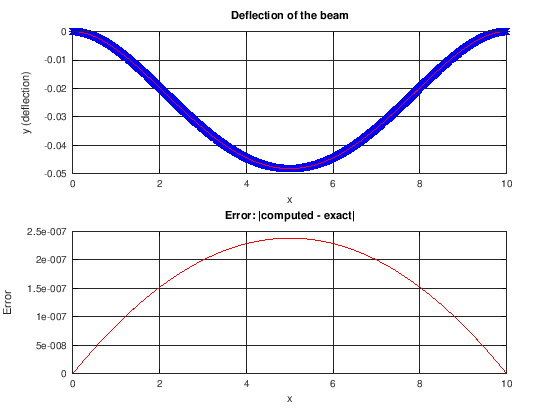

In [4]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;